In [58]:
import matplotlib.pyplot as plt
import numpy as np

# 1) - 2)

Размер изображения:  (512, 512)
Тип изображения:  <class 'numpy.ndarray'>
Тип пикселя:  <class 'numpy.uint8'>


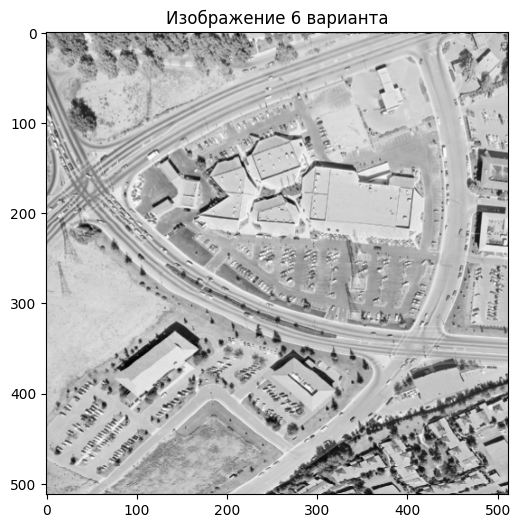

In [74]:
pic = plt.imread('test-1/06.tiff') #test-1/06.tiff


print('Размер изображения: ', pic.shape)
print('Тип изображения: ', type(pic))
print('Тип пикселя: ', type(pic[0][0]))


plt.figure(figsize=(6,6))
plt.imshow(pic, cmap='gray')
plt.title("Изображение 6 варианта")

plt.show()

In [75]:
if pic.dtype != np.uint8:
   pic = (pic * 255).astype(np.uint8)

In [97]:
def stretching_bias(pic ,V_max = 255, V_min = 0):
    tmp = pic.copy()
    # I_max = tmp.max().astype(np.uint8)
    # I_min = tmp.min().astype(np.uint8)
    I_max = 248
    I_min = 64
    

    for row in range(tmp.shape[0]):
        for col in range(tmp.shape[1]):
            tmp[row][col] = (((tmp[row][col] - I_min)/(I_max - I_min))*(V_max - V_min) + V_min).astype(np.uint8)

    return tmp

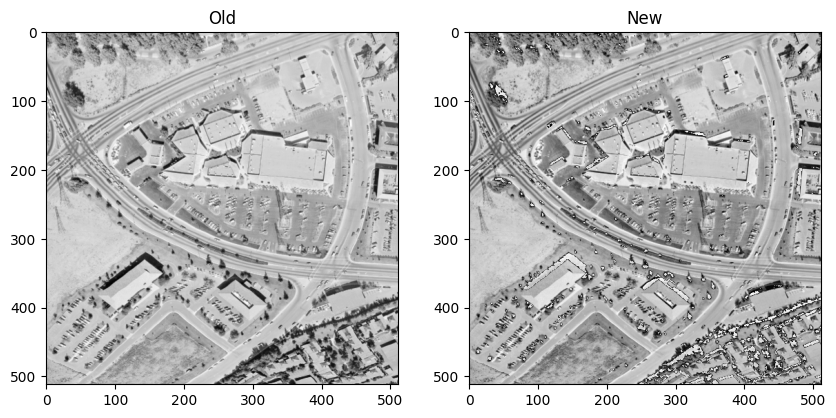

In [98]:
pic_new = stretching_bias(pic)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)

plt.imshow(pic, cmap='gray')
plt.title("Old")

plt.subplot(1,2,2)
plt.imshow(pic_new, cmap='gray')
plt.title("New")

plt.show()

# 3) 

In [83]:
def gistogramm(pic, V_min=0, V_max=255):
    gistogramm_dict = {}
    
    for value in range(V_min, V_max + 1):
        gistogramm_dict[value] = 0
    
    for row in range(len(pic)):
        for col in range(len(pic[0])):
            pixel_value = pic[row][col]
            if V_min <= pixel_value <= V_max:
                gistogramm_dict[pixel_value] += 1
    
    return gistogramm_dict

def normilize(gistogram_value, pic):
    normilize_gist = np.zeros(len(gistogram_value))
    for row in range(len(gistogram_value)):
        normilize_gist[row] = gistogram_value[row]/(pic.shape[0]*pic.shape[1])

    return normilize_gist

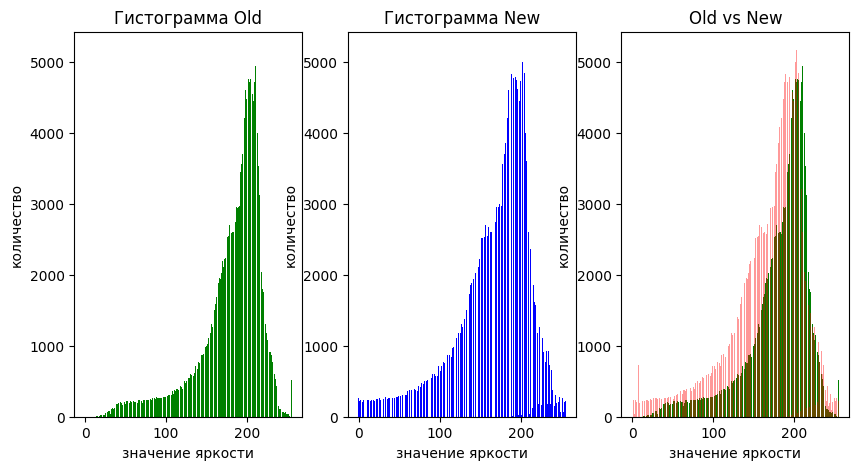

In [100]:
gist_old = gistogramm(pic)
gist_new = gistogramm(pic_new)

value_old = gist_old.keys()
cnt_old = gist_old.values()

value_new = gist_new.keys()
cnt_new = gist_new.values()

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.bar(value_old, cnt_old, color='g')
plt.xlabel('значение яркости')
plt.ylabel('количество')

plt.title('Гистограмма Old')

plt.subplot(1,3,2)
plt.bar(value_new, cnt_new, color='b')
plt.xlabel('значение яркости')
plt.ylabel('количество')
plt.title('Гистограмма New')

plt.subplot(1,3,3)
plt.bar(value_old, cnt_old, color='g')
plt.bar(value_new, cnt_new, color='r', alpha=0.4)
plt.xlabel('значение яркости')
plt.ylabel('количество')
plt.title('Old vs New')

plt.show()

# 4) - 5)

Размер изображения:  (256, 256)
Тип изображения:  <class 'numpy.ndarray'>
Тип пикселя:  <class 'numpy.uint8'>


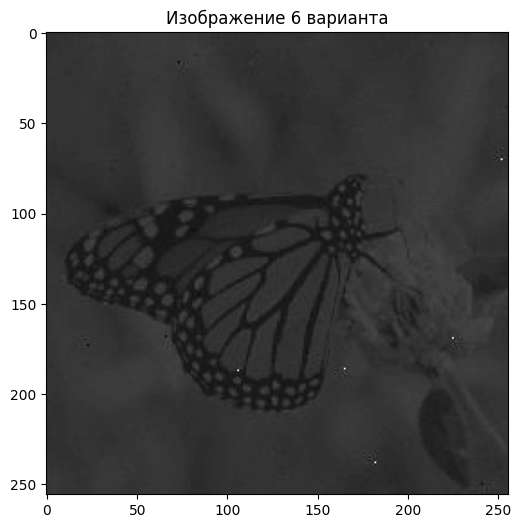

In [65]:
pic = plt.imread('test-2/test_06.jpg') #


print('Размер изображения: ', pic.shape)
print('Тип изображения: ', type(pic))
print('Тип пикселя: ', type(pic[0][0]))


plt.figure(figsize=(6,6))
plt.imshow(pic,cmap='gray')
plt.title("Изображение 6 варианта")

plt.show()

In [66]:
def part_N(pic):
    tmp = pic.copy()
    array_planes = np.zeros((64, 64, 16),dtype=np.uint8)
    w=4
    for cnt in range(array_planes.shape[2]):
        
        if cnt <4:
            array_planes[:,:, cnt] = tmp[:64, 64*cnt:64*(cnt+1)]
        if cnt>=4 and cnt <8:
            array_planes[:,:, cnt] = tmp[64:128, 64*(cnt-w):64*(cnt-w+1)]
        if cnt>=8 and cnt <12:
            array_planes[:,:, cnt] = tmp[128:192, 64*(cnt-w*2):64*(cnt-w*2+1)]
        if cnt>=12 and cnt < 16:
            array_planes[:,:, cnt] = tmp[192:256, 64*(cnt-w*3):64*(cnt-w*3+1)]

    return array_planes

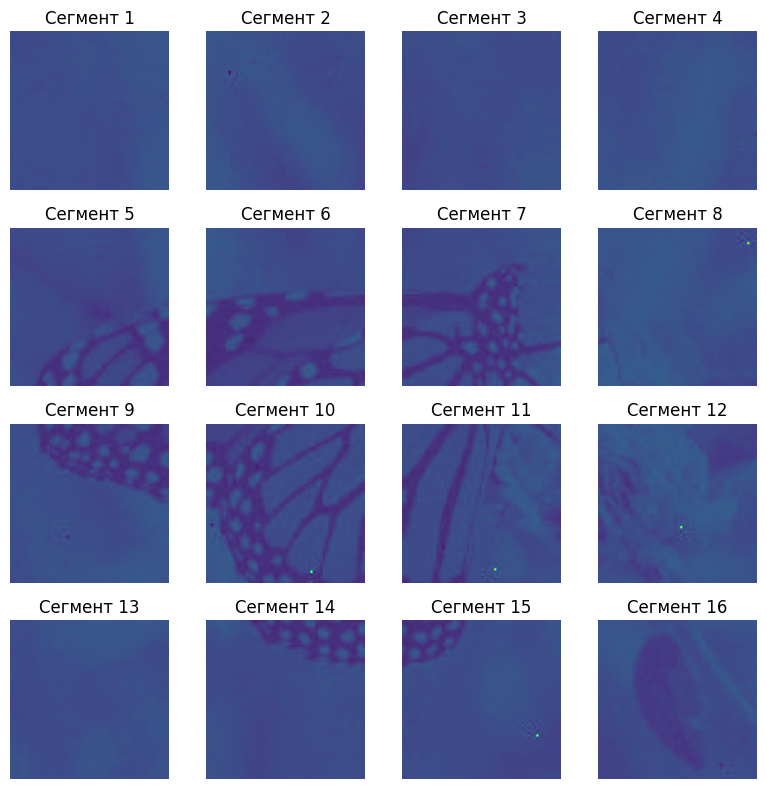

In [67]:
array_segments = part_N(pic)

plt.subplots(4, 4, figsize=(8, 8))

for cnt in range(16):
    plt.subplot(4,4,cnt+1)
    plt.imshow(array_segments[:,:,cnt], vmin=0,vmax=255)
    plt.axis('off')
    plt.title(f'Сегмент {cnt+1}')
    
plt.tight_layout()
plt.show()

In [68]:
def CDF(gistogramm_value):
    sum_val = 0
    cdf = np.zeros(len(gistogramm_value))

    for i in range(len(gistogramm_value)):
        sum_val += gistogramm_value[i] 
        cdf[i] = sum_val
    
    return cdf

def local_equalization_segment(segment):

    new_segment = np.zeros((64, 64),dtype=np.uint8)

    gist_segment = gistogramm(segment)
    gist_value = np.array(list(gist_segment.values()))
    norm_gist_segment = normilize(gist_value, segment)
    cdf = CDF(norm_gist_segment)

    for row in range(new_segment.shape[0]):
        for col in range(new_segment.shape[1]):
            new_segment[row][col] = np.floor((256-1)*cdf[segment[row][col]])

    return new_segment


In [69]:
array_planes = np.zeros((64, 64, 16),dtype=np.uint8)
for i in range(array_segments.shape[2]):
    array_planes[:,:,i] = local_equalization_segment(array_segments[:,:,i])

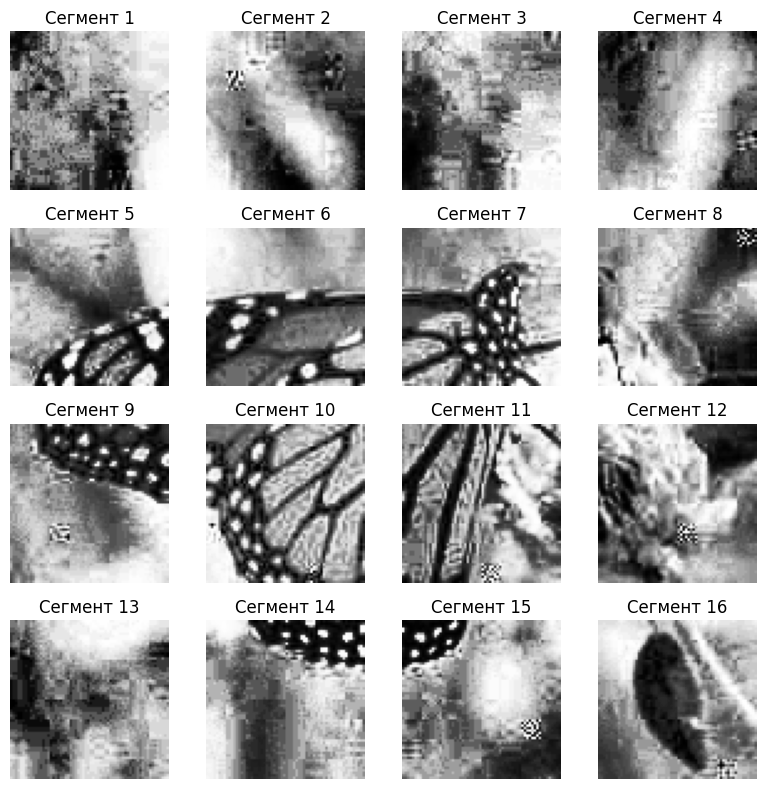

In [70]:
plt.subplots(4, 4, figsize=(8, 8))

for cnt in range(16):
    plt.subplot(4,4,cnt+1)
    plt.imshow(array_planes[:,:,cnt], vmin=0,vmax=255, cmap='gray')
    plt.axis('off')
    plt.title(f'Сегмент {cnt+1}')
    
plt.tight_layout()
plt.show()

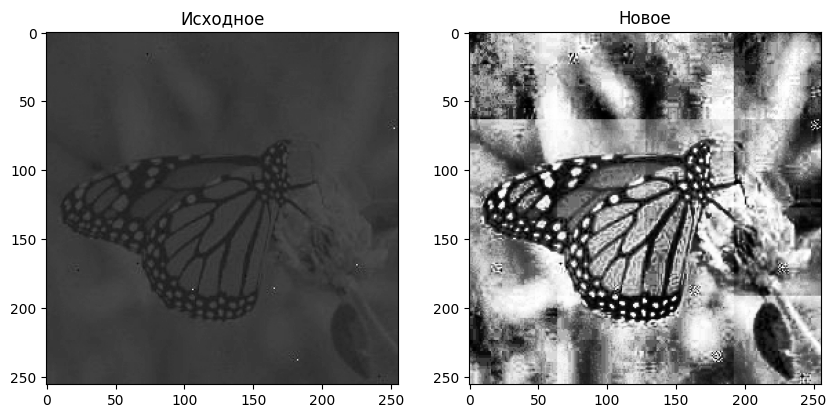

In [71]:
part_1 = np.concatenate((array_planes[:,:,0],
                      array_planes[:,:,1],
                      array_planes[:,:,2],
                      array_planes[:,:,3]),axis=1)

part_2 = np.concatenate((array_planes[:,:,4],
                      array_planes[:,:,5],
                      array_planes[:,:,6],
                      array_planes[:,:,7]),axis=1)

part_3 = np.concatenate((array_planes[:,:,8],
                      array_planes[:,:,9],
                      array_planes[:,:,10],
                      array_planes[:,:,11]),axis=1)
part_4 = np.concatenate((array_planes[:,:,12],
                      array_planes[:,:,13],
                      array_planes[:,:,14],
                      array_planes[:,:,15]),axis=1)

new_image = np.concatenate((part_1,part_2,part_3,part_4),axis=0)



plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.imshow(pic, cmap='gray', vmin=0, vmax=255)
plt.title('Исходное')

plt.subplot(1,2,2)
plt.imshow(new_image, cmap='gray', vmin=0, vmax=255)
plt.title('Новое')

plt.show()

In [72]:
# core = np.zeros((3,3))
#             core[1][1] = segment[row][col]
#             if row == 0 and col == 0: # левый верхний угол
#                 core[0,:] = 0
#                 core[1][0] = 0
#                 core[1][2] = segment[row][col+1]
#                 core[2][0] = 0 
#                 core[2][1] = segment[row+1][col]
#                 core[2][2] = segment[row+1][col+1]
#             elif row == 0 and col == 63: # правый верхний угол
#                 core[0,:] = 0
#                 core[1][0] = segment[row][col-1]
#                 core[1][2] = 0
#                 core[2][0] = segment[row+1][col-1]
#                 core[2][1] = segment[row+1][col]
#                 core[2][2] = 0
#             elif row == 0 and col!=63: # верхняя граница
#                 core[0,:] = 0
#                 core[1,:] =segment[row, col-1:col+2]
#                 core[2,:] =segment[row+1, col-1:col+2]
#             elif col == 0 and row!=0 and row!=63: # левая граница 
#                 core[0][0] = 0
#                 core[0,1:3] = segment[row-1,col:col+2]
#                 core[1][0] = 0
#                 core[1,1:3] = segment[row,col:col+2]
#                 core[2][0] = 0
#                 core[2,1:3] = segment[row+1,col:col+2]
#             elif col == 63 and row!=0 and row!=63: # правая граница
#                 core[0,0:2] = segment[row-1,col-1:col+1]
#                 core[0][2] = 0
#                 core[1,0:2] = segment[row,col-1:col+1]
#                 core[1][2] = 0
#                 core[2,0:2] = segment[row+1,col-1:col+1]
#                 core[2][0] = 0
#             elif row == 63 and col== 0: # лeвый нижний угол
#                 core[0][0] = 0
#                 core[0,1:3] = segment[row-1,col:col+2]
#                 core[1][0] = 0
#                 core[1][2] = segment[row][col+1]
#                 core[2,:] = 0
#             elif row == 63 and col==63: # правый нижний угол
#                 core[0,0:2] = segment[row,col-1:col+2]
#                 core[0][2] = 0
#                 core[1][0] = segment[row][col-1]
#                 core[1][2] = 0
#                 core[2,:] = 0
#             elif row == 63: # нижняя граница
#                 core[0:2,:] = segment[row-1:row+1, col-1:col+2]
#                 core[2,:] = 0
#             elif row!=0 and col!=0 and row!= 63 and col!= 63: # вся оставшаяся матрица
#                 core[:,:] = segment[row-1:row+2,col-1:col+2]
            
#             core_gistogramm = gistogramm(core)
#             gistogram_value = np.array(list(core_gistogramm.values()))
#             normilize_gistogram = normilize(gistogram_value, core)
#             T_array = equalization(normilize_gistogram)

#             segment[row][col] = T_array[4]

